In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [18]:
df = pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df.dropna(inplace=True)

In [27]:
df.shape

(20433, 10)

In [88]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False).astype(float)
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [89]:
target_col = 'median_house_value'
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col].values
X.shape

(20433, 13)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
# X_train_bias = np.c_[np.ones((X_train_scaled.shape[0],1)), X_train_scaled]
# X_test_bias = np.c_[np.ones((X_test_scaled.shape[0],1)), X_test_scaled]


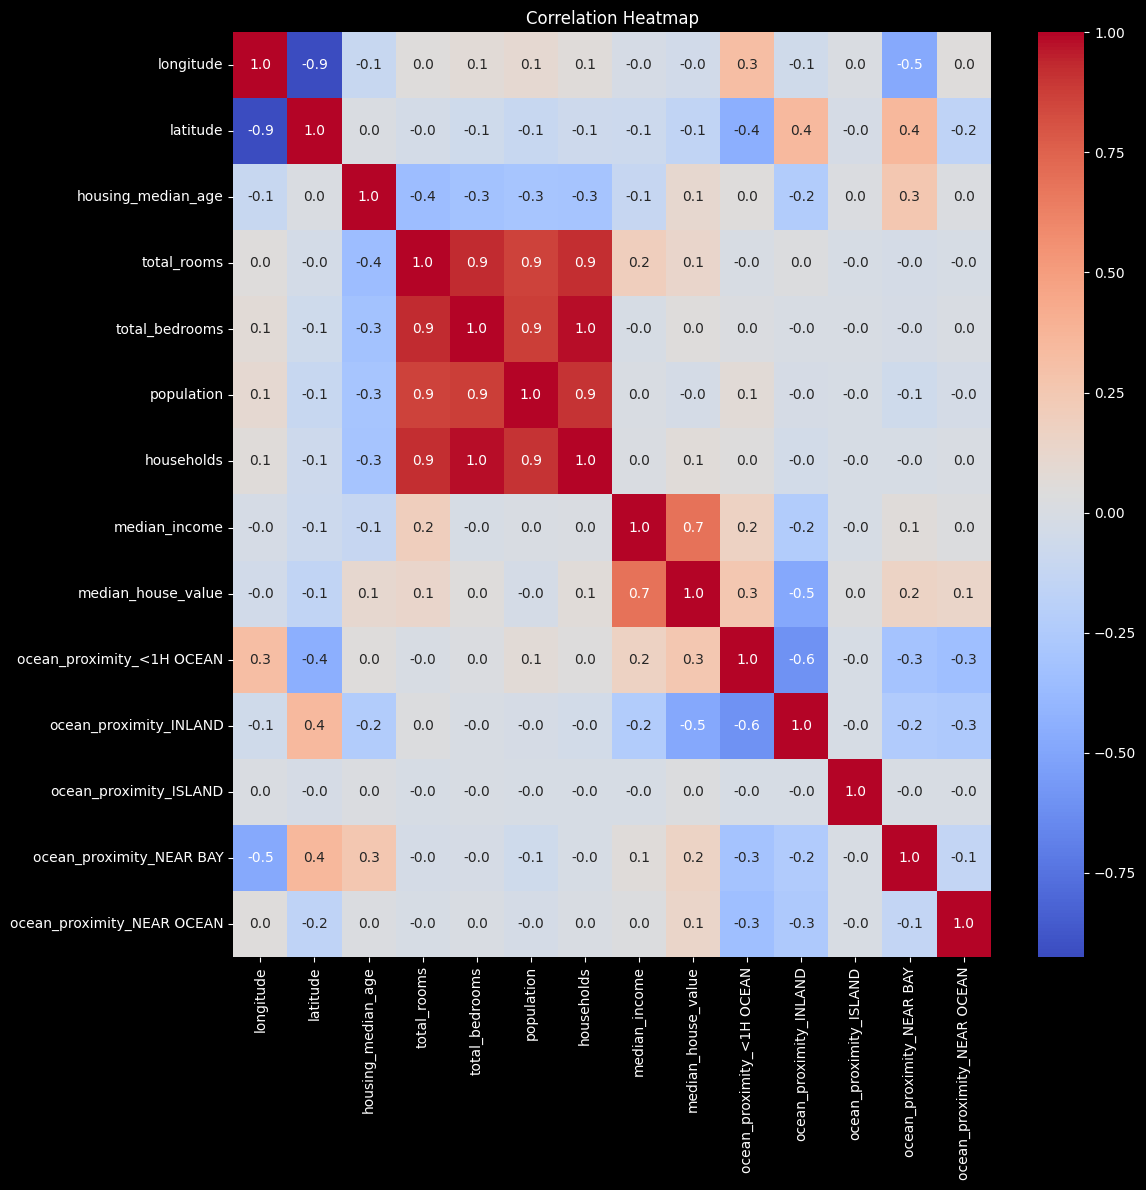

In [70]:
plt.figure(figsize=(12,12))
sns.heatmap(df_encoded[df_encoded.columns].corr(), annot=True, cmap="coolwarm", fmt=".1f", cbar=True)
plt.title("Correlation Heatmap", fontsize=12)
plt.tight_layout()
plt.show()

In [71]:


class MyLinearRegression:
    def __init__(self):
        self.theta = None
        self.loss_history = []

    def add_bias(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def compute_loss(self, X, y):
        n = len(y)
        y_pred = X @ self.theta
        return (1 / (2 * n)) * np.sum((y_pred - y) ** 2)

    def fit_OLS(self, X, y):
        X_bias = self.add_bias(X)
        self.theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def fit_gd(self, X, y, alpha=0.01, iterations=1000, tol=1e-7):
        X_bias = self.add_bias(X)
        n, d = X_bias.shape
        self.theta = np.zeros(d)
        self.loss_history = []

        for i in range(iterations):
            y_pred = X_bias @ self.theta
            grad = (1 / n) * X_bias.T @ (y_pred - y)
            self.theta -= alpha * grad

            loss = self.compute_loss(X_bias, y)
            self.loss_history.append(loss)

            if i > 0 and abs(self.loss_history[-2] - loss) < tol:
                print(f"Early stopping at iteration {i}")
                break

    def predict(self, X):
        X_bias = self.add_bias(X)
        return X_bias @ self.theta

In [98]:
model_gd = MyLinearRegression()
model_gd.fit_gd(X_train_scaled, y_train, alpha=0.02, iterations=2000)
y_pred_gd = model_gd.predict(X_test_scaled)

model_OLS = MyLinearRegression()
model_OLS.fit_OLS(X_train_scaled, y_train)
y_pred_OLS = model_OLS.predict(X_test_scaled)

In [44]:
#sci-kit model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_sklearn = lr_model.predict(X_test_scaled)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"--- {model_name} ---")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")
    print(f"MAE:  {mae:.4f}\n")

In [96]:
evaluate(y_test, y_pred_OLS, "OLS Model Equation (Class)")
evaluate(y_test, y_pred_gd, "Gradient Descent (Class)")
evaluate(y_test, y_pred_sklearn, "scikit Learn Model")



--- OLS Model Equation (Class) ---
MSE:  4800141570.4841
RMSE: 69283.0540
R2:   0.6490
MAE:  50390.2420

--- Gradient Descent (Class) ---
MSE:  4814436272.4576
RMSE: 69386.1389
R2:   0.6479
MAE:  50348.6216

--- scikit Learn Model ---
MSE:  4802173538.6042
RMSE: 69297.7167
R2:   0.6488
MAE:  50413.4333



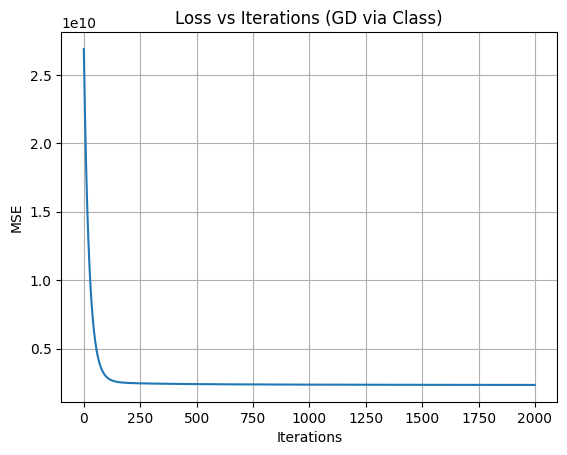

In [100]:
# Plot loss vs iterations
plt.style.use("default")
plt.plot(model_gd.loss_history)
plt.title("Loss vs Iterations (GD via Class)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

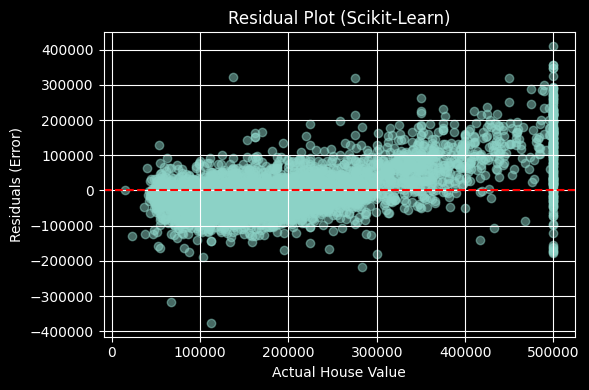

In [68]:
residuals = y_test - y_pred_sklearn

plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual House Value")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (Scikit-Learn)")
plt.grid(True)
plt.tight_layout()
plt.show()

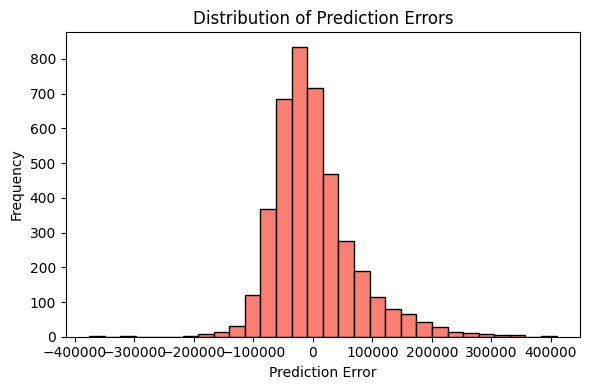

In [52]:
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

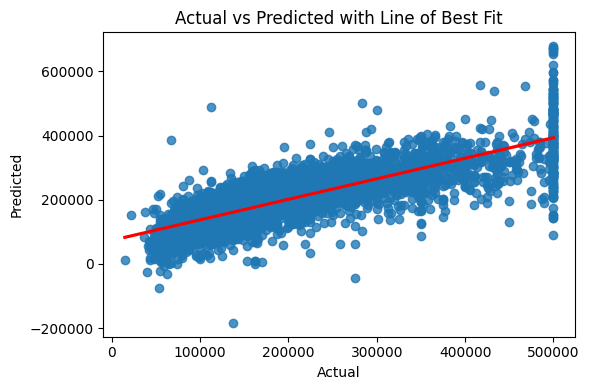

In [53]:

plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=y_pred_sklearn, line_kws={"color": "red"})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted with Line of Best Fit")
plt.tight_layout()
plt.show()

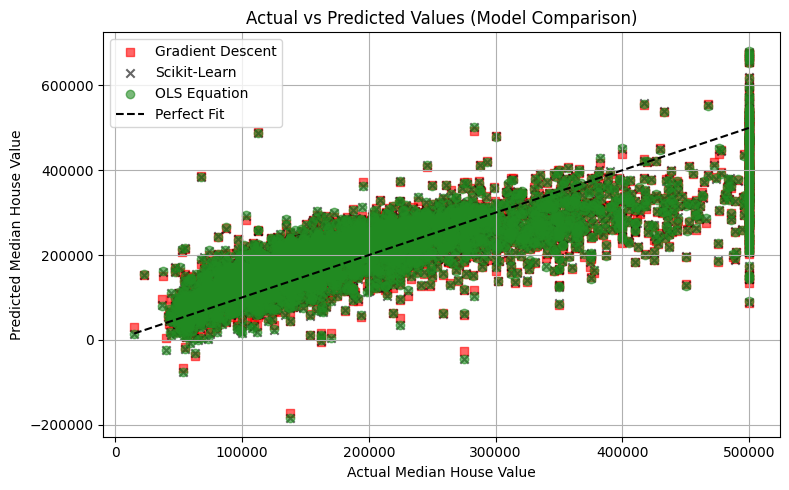

In [59]:
plt.figure(figsize=(8, 5))

plt.scatter(y_test, y_pred_gd, alpha=0.6, label='Gradient Descent',
            color='red', marker='s')

plt.scatter(y_test, y_pred_sklearn, alpha=0.6, label='Scikit-Learn',
            color='black', marker='x')

plt.scatter(y_test, y_pred_OLS, alpha=0.6, label='OLS Equation',
            color='forestgreen', marker='o')

# Perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', label='Perfect Fit')

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values (Model Comparison)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


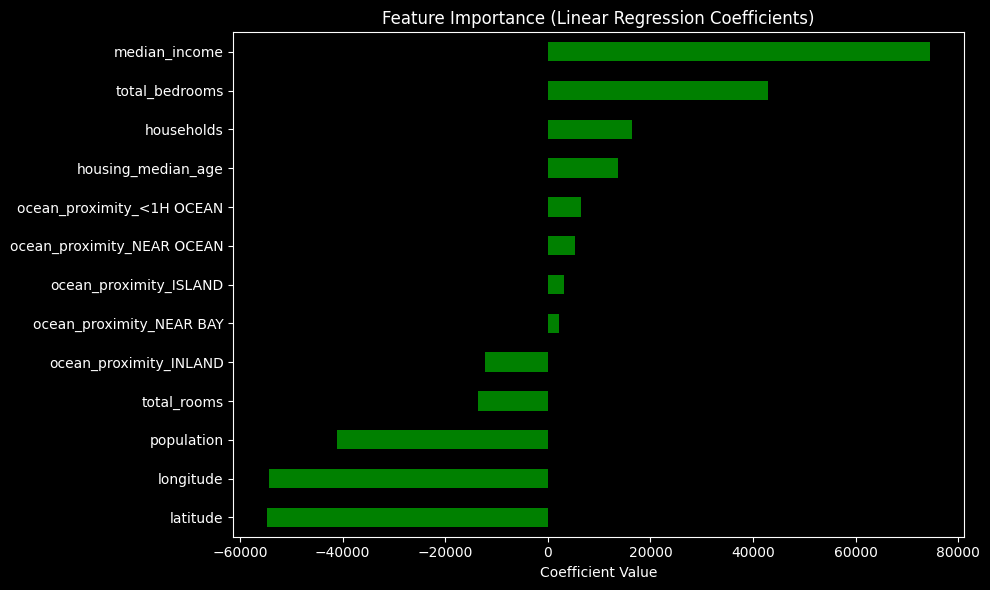

In [62]:
coefficients = pd.Series(lr_model.coef_, index=X.columns)
coefficients_sorted = coefficients.sort_values()
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))
coefficients_sorted.plot(kind='barh', color='green')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()